In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Patrones espaciales
from pointpats import distance_statistics, QStatistic, random, PointPattern

/home/miguel/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.11.4-CAPI-1.17.4) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
#!ls
#! pip3 install pointpats
#!pip install -U libpysal
#!pip install -U numba

In [3]:
db = pd.read_csv("knickpoints_csv_campos_añadidos.csv")

In [4]:
db.info()
print(db[['x', 'y']])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dz      960 non-null    float64
 1   x       960 non-null    float64
 2   y       960 non-null    float64
dtypes: float64(3)
memory usage: 22.6 KB
             x          y
0   -73.705635  10.492996
1   -73.774866  10.772677
2   -74.191487  11.085582
3   -74.145715  11.084552
4   -74.084399  11.077590
..         ...        ...
955 -73.518520  10.458726
956 -73.336650  10.732665
957 -73.501371  10.415699
958 -73.446140  10.684409
959 -73.445755  10.759900

[960 rows x 2 columns]


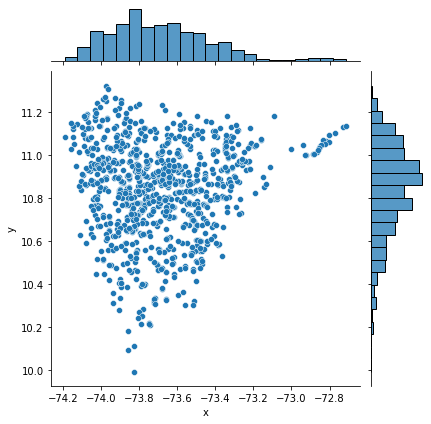

In [5]:
import seaborn as sbn 
sbn.jointplot(x='x', y='y', data=db);

In [6]:
from pointpats import centrography
mean_center = centrography.mean_center(db[['x', 'y']])
med_center = centrography.euclidean_median(db[['x', 'y']])

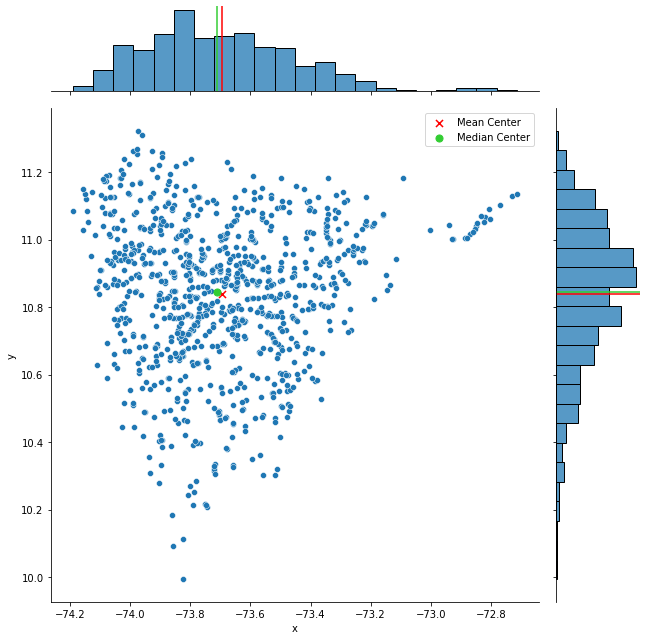

In [22]:
# Generate scatter plot
joint_axes = sbn.jointplot(x='x', y='y',data=db,height=9)
# Add mean point and marginal lines
joint_axes.ax_joint.scatter(*mean_center, color='red', marker='x', s=50, label='Mean Center')
joint_axes.ax_marg_x.axvline(mean_center[0], color='red')
joint_axes.ax_marg_y.axhline(mean_center[1], color='red')
# Add median point and marginal lines
joint_axes.ax_joint.scatter(*med_center, color='limegreen', marker='o', s=50, label='Median Center')
joint_axes.ax_marg_x.axvline(med_center[0], color='limegreen')
joint_axes.ax_marg_y.axhline(med_center[1], color='limegreen')
# Legend
joint_axes.ax_joint.legend()

# Clean axes
#joint_axes.ax_joint.set_axis_off()
# Display
plt.show()


<AxesSubplot:xlabel='x', ylabel='y'>

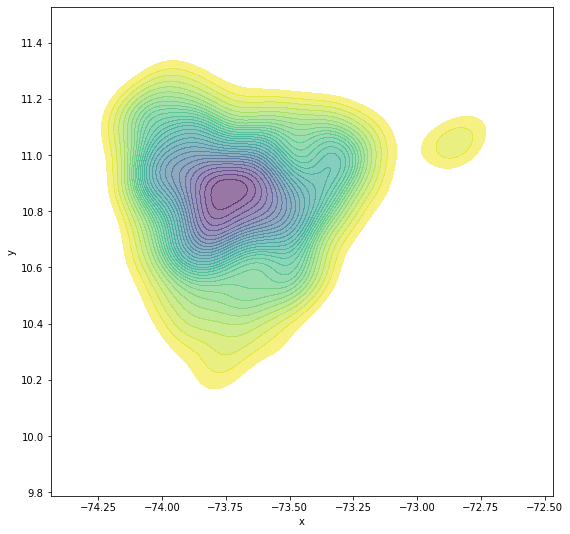

In [9]:
# Set up figure and axis
f,ax = plt.subplots(1, figsize=(9,9))
sbn.kdeplot(x=db['x'],y=db['y'],n_levels=30,fill=True,alpha=0.55,cmap='viridis_r')

## Extensión, Agrupamiento

In [10]:
coordinates = db[['x','y']].values

In [11]:
print(coordinates)

[[-73.70563455  10.4929962 ]
 [-73.77486606  10.77267708]
 [-74.1914868   11.08558223]
 ...
 [-73.5013713   10.41569878]
 [-73.44614019  10.68440946]
 [-73.44575489  10.75990032]]


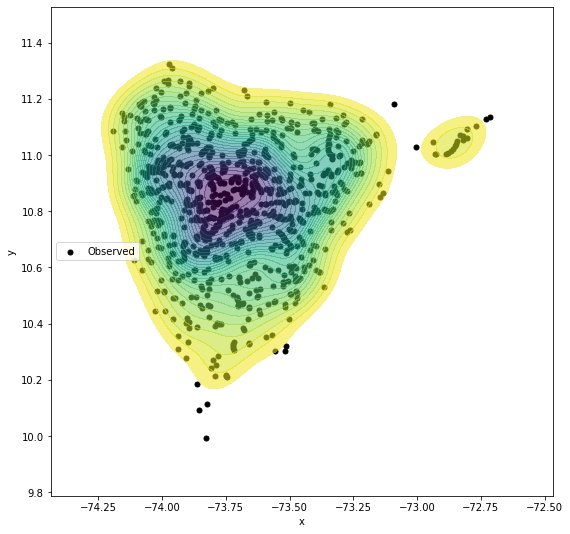

In [12]:
f,ax = plt.subplots(1, figsize=(9,9))
plt.scatter(*coordinates.T, color='k', marker='.',s=100, label='Observed')
ax.legend(ncol=1, loc='center left')
sbn.kdeplot(x=db['x'],y=db['y'],n_levels=30,fill=True,alpha=0.55,cmap='viridis_r')
plt.show()

## Alfabeto de funciones de Ripley

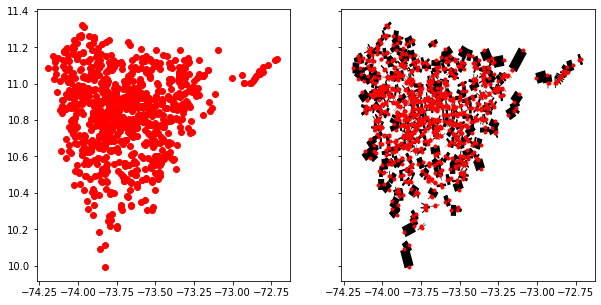

In [13]:
# this code should be hidden in the book, and only the plot visible!
f,ax = plt.subplots(1,2,figsize=(10,5), sharex=True, sharey=True)
ax[0].scatter(*coordinates.T, color='red')
ax[1].scatter(*coordinates.T, color='red',
              zorder=100, marker='.', label='Points')
nn_ixs, nn_ds = PointPattern(coordinates).knn(1)
first = True
for coord, nn_ix, nn_d in zip(coordinates, nn_ixs, nn_ds):
    dx, dy = coordinates[nn_ix].squeeze() - coord
    arrow = ax[1].arrow(*coord, dx,dy, 
              length_includes_head=True, 
                overhang=0, head_length=0.001*3,
                head_width=0.001*3, width=0.02*3,
                linewidth=0, facecolor='k',
                head_starts_at_zero=False)
#    if first:
#        plt.plot((1e100, 1e101), (0,1), color='k', 
#                 marker='<', markersize=10,
#                 label='Nearest Neighbor to Point')
#    first = False




plt.show()

In [14]:
# Ripley's G
g_test = distance_statistics.g_test(coordinates, support=40, keep_simulations=True)

In [15]:
print(g_test)

GtestResult(support=array([0.        , 0.00324711, 0.00649421, 0.00974132, 0.01298842,
       0.01623553, 0.01948263, 0.02272974, 0.02597684, 0.02922395,
       0.03247105, 0.03571816, 0.03896526, 0.04221237, 0.04545947,
       0.04870658, 0.05195368, 0.05520079, 0.05844789, 0.061695  ,
       0.06494211, 0.06818921, 0.07143632, 0.07468342, 0.07793053,
       0.08117763, 0.08442474, 0.08767184, 0.09091895, 0.09416605,
       0.09741316, 0.10066026, 0.10390737, 0.10715447, 0.11040158,
       0.11364868, 0.11689579, 0.12014289, 0.12339   , 0.1266371 ]), statistic=array([0.        , 0.09583333, 0.38645833, 0.56875   , 0.675     ,
       0.76458333, 0.82395833, 0.87395833, 0.9       , 0.92708333,
       0.940625  , 0.95625   , 0.971875  , 0.97604167, 0.98229167,
       0.98854167, 0.990625  , 0.99166667, 0.99375   , 0.99479167,
       0.99583333, 0.99583333, 0.996875  , 0.996875  , 0.99791667,
       0.99791667, 0.99791667, 0.99791667, 0.99791667, 0.99791667,
       0.99791667, 0.99791667,

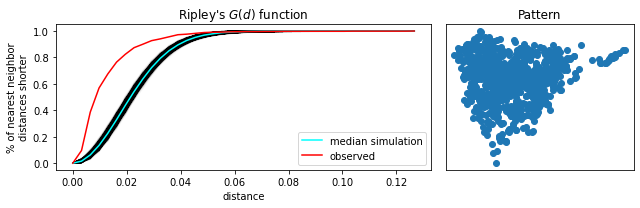

In [16]:
f,ax = plt.subplots(1,2,figsize=(9,3),gridspec_kw=dict(width_ratios=(6,3)))
# plot all the simulations with very fine lines
ax[0].plot(g_test.support, g_test.simulations.T, color='k', alpha=.01)
# and show the average of simulations
ax[0].plot(g_test.support, np.median(g_test.simulations, axis=0), color='cyan',label='median simulation')


# and the observed pattern's G function
ax[0].plot(g_test.support, g_test.statistic, label = 'observed', color='red')

# clean up labels and axes
ax[0].set_xlabel('distance')
ax[0].set_ylabel('% of nearest neighbor\ndistances shorter')
ax[0].legend()
#ax[0].set_xlim(0,2000)
ax[0].set_title(r"Ripley's $G(d)$ function")

# plot the pattern itself on the next frame
ax[1].scatter(*coordinates.T)

# and clean up labels and axes there, too
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Pattern')
f.tight_layout()
plt.show()

In [17]:
# Ripley's F
f_test = distance_statistics.f_test(coordinates, support=40, keep_simulations=True)

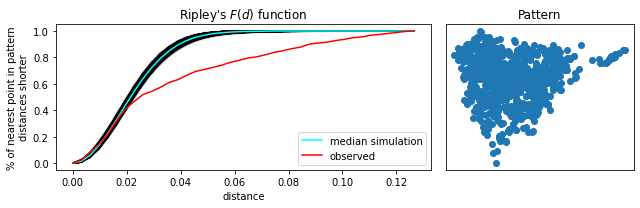

In [18]:
f,ax = plt.subplots(1,2,figsize=(9,3), gridspec_kw=dict(width_ratios=(6,3)))

# plot all the simulations with very fine lines
ax[0].plot(f_test.support, f_test.simulations.T, color='k', alpha=.01)
# and show the average of simulations
ax[0].plot(f_test.support, np.median(f_test.simulations, axis=0), color='cyan',label='median simulation')


# and the observed pattern's F function
ax[0].plot(f_test.support, f_test.statistic, label = 'observed', color='red')

# clean up labels and axes
ax[0].set_xlabel('distance')
ax[0].set_ylabel('% of nearest point in pattern\ndistances shorter')
ax[0].legend()

ax[0].set_title(r"Ripley's $F(d)$ function")

# plot the pattern itself on the next frame
ax[1].scatter(*coordinates.T)

# and clean up labels and axes there, too
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Pattern')
f.tight_layout()
plt.show()

## Agrupamiento DBSCAN

In [19]:
from sklearn.cluster import DBSCAN
# Define DBSCAN
clusterer = DBSCAN()
# Fit to our data
clusterer.fit(db[["x", "y"]])


DBSCAN()

In [20]:
lbls = pd.Series(clusterer.labels_, index=db.index)
print(db.index)

RangeIndex(start=0, stop=960, step=1)


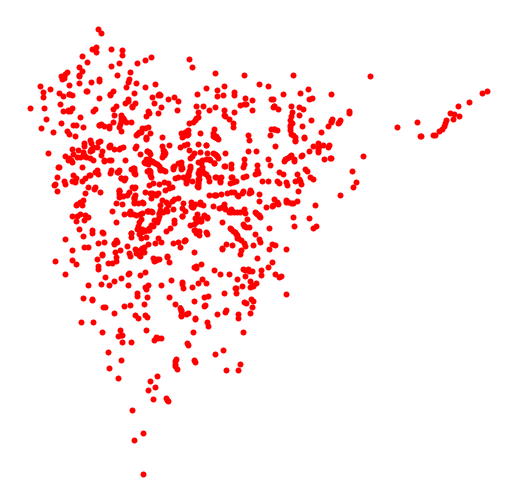

In [21]:
# Setup figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Subset points that are not part of any cluster (noise)
noise = db.loc[lbls, ['x', 'y']]
# Plot noise in grey
ax.scatter(noise['x'], noise['y'], c='grey', s=5, linewidth=0)
# Plot all points that are not noise in red
# NOTE how this is done through some fancy indexing, where
#      we take the index of all points (tw) and substract from
#      it the index of those that are noise
ax.scatter(db.loc[db.index.difference(noise.index), 'x'], \
           db.loc[db.index.difference(noise.index), 'y'], \
          c='red', linewidth=0)

# Remove axes
ax.set_axis_off()
# Display the figure
plt.show()